In [1]:
import pandas as pd

import sys
sys.path.append('../src')
from cellopype import Cell

# prepare to plot
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

<IPython.core.display.Javascript object>


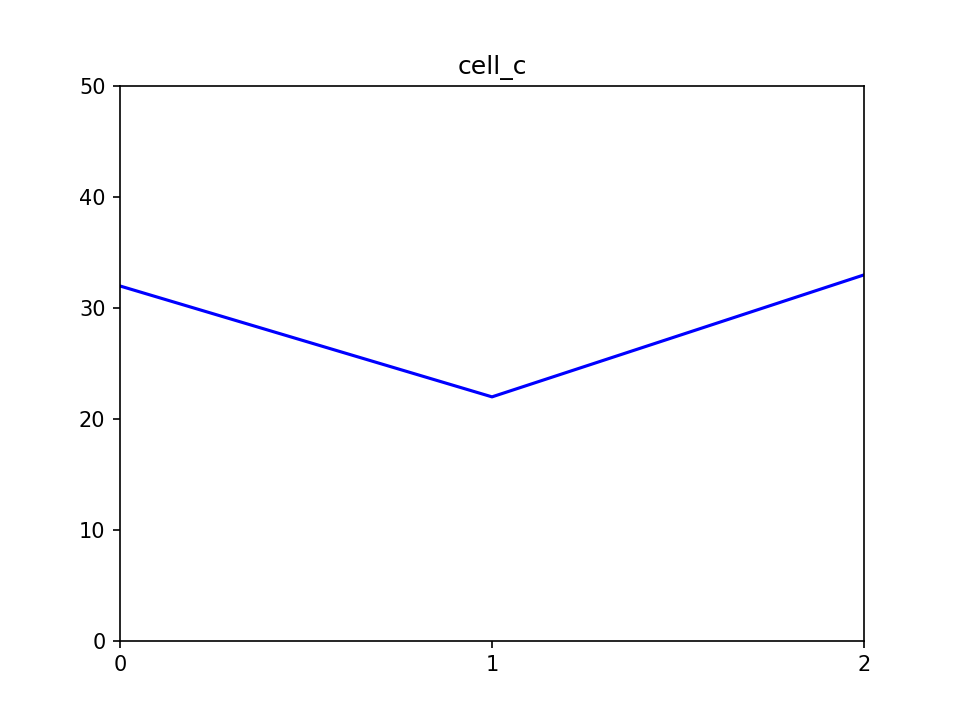

In [2]:
fig, ax = plt.subplots(1)
plt.xlim([0, 2])
plt.ylim([0,50])
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

def myplot(df):  # plot df['value']
    global ax
    if ax.lines:  # updating existing plot
        ax.lines[0].set_xdata(df.index)
        ax.lines[0].set_ydata(df.value)
    else:
        ax.plot(df.index, df, 'b') # 'b': blue
    plt.draw()  # redraws!

dfA = pd.DataFrame([1, 2, 3], columns=["value"])
dfB = pd.DataFrame([10, 20, 30], columns=["value"])
dfC = pd.DataFrame([30, 2, 3], columns=["value"])

cell_a = Cell(recalc=lambda: dfA)
cell_b = Cell(recalc=lambda: dfB)

# pd.DataFrame.add
cell_c = Cell(recalc=pd.DataFrame.add, sources=[cell_a, cell_b], on_change=myplot)
plt.title('cell_c')
plt.show()

# plot shows current values for a+b

In [3]:
# change values for cell_a:
dfA.loc[0,'value']=22
cell_a.invalidate()
#
# plot of cell_c should update now
#